In [1]:

import pandas as pd
from sklearn.cluster import DBSCAN
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
try:
    df = pd.read_json("livedata.json")
    # Display the first 20 rows of the DataFrame
    print(df.head(20))
except FileNotFoundError:
    print("Error: 'livedata.json' file not found. Please check the file path.")
except ValueError as e:
    print(f"Error loading JSON: {e}")
df.head(20)

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
5,Erin,2020-07-04 14:35:30,13.132235,77.694382
6,Bob,2020-07-04 13:35:30,13.224501,77.668313
7,Grace,2020-07-04 14:35:30,13.142778,77.691560
8,Alice,2020-07-04 22:35:30,13.090368,77.561579
9,Frank,2020-07-04 12:35:30,13.208293,77.664607


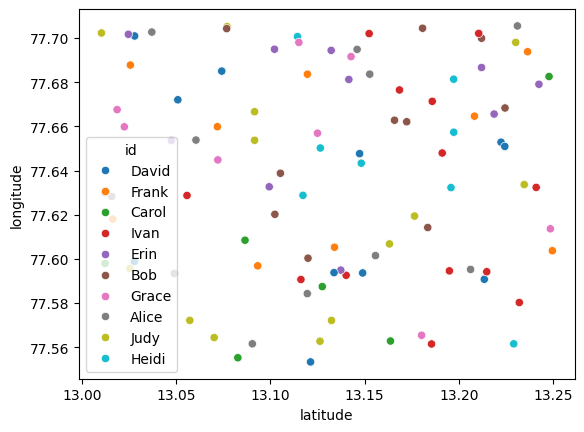

In [3]:
sns.scatterplot(data=df,x='latitude',y='longitude',hue='id')
plt.show()

[]


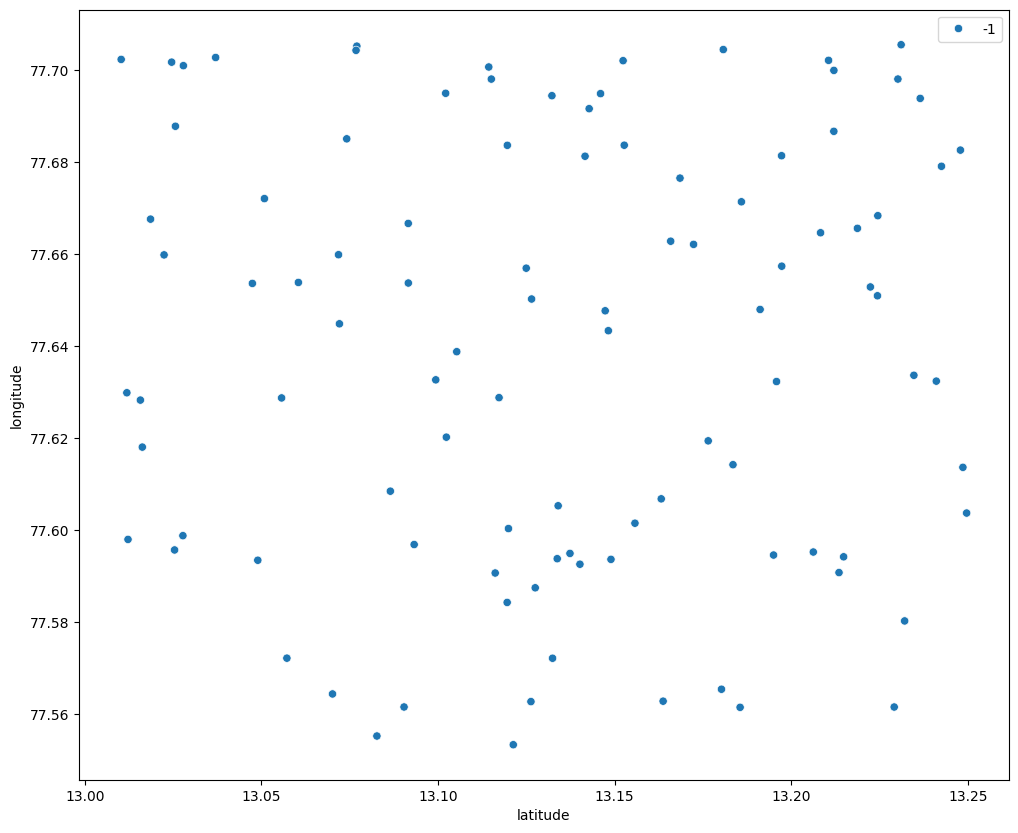

In [4]:
def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names, model # return a tuple containing the list and the model

infected, model = get_infected_names("Erin") # unpack the returned values
print(infected)

labels = model.labels_ # Now you can use model here
fig = plt.figure(figsize=(12, 10))
# Pass the DataFrame to the `data` argument, and specify x and y columns using keywords.
sns.scatterplot(data=df, x='latitude', y='longitude', hue=labels, palette='tab10')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [5]:
df

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-04 15:35:30,13.148953,77.593651,-1
1,David,2020-07-04 16:35:30,13.222397,77.652828,-1
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,-1
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,-1
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,-1
...,...,...,...,...,...
95,Judy,2020-07-04 16:35:30,13.176481,77.619396,-1
96,Bob,2020-07-04 15:35:30,13.172339,77.662080,-1
97,Grace,2020-07-04 23:35:30,13.115079,77.697991,-1
98,Bob,2020-07-04 19:35:30,13.180751,77.704404,-1


In [6]:
# convert degrees to radians for latitude and longitude
df = pd.read_json("livedata.json")
df['latitude'] = df['latitude'].apply(radians)
df['longitude'] = df['longitude'].apply(radians)

def get_infected_names(input_name):
    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers

    # use haversine distance with radians data
    model = DBSCAN(eps=epsilon, min_samples=3, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])

    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass

    return infected_names

# test with input name "David"
print(get_infected_names("David"))

['Frank', 'Carol', 'Ivan', 'Erin', 'Bob', 'Grace', 'Alice', 'Judy', 'Heidi']
